# Data Preparation

1. Checking 2018 file - Not possible for the moment
2. Checking 2013 file - done / variables in three countries are ok, just for the p file 
3. Indicator preparation 
4. Checking the rest of the files

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [308]:
# Función para generar strings con nombres de los ficheros cambiando el identificador del año 
# Definición de los campos: 
# pr: prefix - IE: './files/' - string
# sb: subfix: IE: '_2013p_EUSILC.csv' - string
# cr: country IE: ['LT'...] - list
def filelist(st1,st2,cr): 
    filelist = []
    for s in cr:
        filename = st1 + s + st2
        filelist.append(filename)
    return filelist

# Función para concatenar los ficheros de los distintos años en un sólo fichero - adaptar y revisar
def concatenated_df(df_list, var_list):
    df_temp = pd.DataFrame()
    for file in df_list:
        df = pd.read_csv(file , usecols = var_list, low_memory = False)
        if df_temp.shape == (0,0):
            df_temp = df
        else: 
            df_temp = pd.concat([df_temp,df])
    return df_temp

# Función para convertir a float las variable de renta y y otras que deberían ser numéricas
def to_numeric(x):
    if type(x) is str:
        x = x.lstrip()
        if not x:
            return np.NaN
        else:
            return float(x)
    else: 
        return x

# Privación material personal
def MatDepriv(x):
    if x == '1':
        return 'Yes'
    elif x == '2':
        return 'No affordable'
    elif x == '3': 
        return 'No, other reason'
    else:
        return 'Unknown / Not Declared'

In [236]:
df_temp.head()

,PB010,PB020,PB030,PB040,PB060,PB100,PB110,PB120,PB130,PB140,PB150,PB190,PB200,PB220A,PE010,PE020,PE040,PL031,PL035,PL015,PL020,PL025,PL040,PL051,PL060,PL100,PL111,PL120,PL130,PL140,PL150,PL160,PL170,PL180,PL190,PH010,PH020,PH030,PH040,PH050,PH060,PH070,PY020N,PY035N,PY010G,PY020G,PY021G,PY030G,PY031G,PY035G,PY050G,PY080G,PY090G,PY100G,PY110G,PY120G,PY130G,PY140G,PY200G,PD020,PD030,PD050,PD060,PD070,PD080,PD090,PW010,PW020,PW030,PW040,PW050,PW060,PW070,PW080,PW090,PW100,PW110,PW120,PW130,PW140,PW150,PW160,PW170,PW180,PW190,PW200,PW210,PW220,PX010,PX020,PX030,PX040,PX050,PX200
0,2013,LT,71.0,253.664,NaN,2.0,2013.0,10.0,3.0,1932,1,4.0,3,LT,2.0,NaN,1.0,7.0,NaN,NaN,NaN,NaN,3.0,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,0.0,1.0,0,0,0,0,3788,228,0,0,0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,5.0,6.0,7.0,7.0,7.0,5.0,4.0,3.0,NaN,3.0,NaN,6.0,3.0,6.0,6.0,8.0,7.0,1.0,2.0,8.0,8.0,8.0,3.0,3.4528,80.0,7.0,1.0,NaN,234.81080
1,2013,LT,541.0,253.664,NaN,2.0,2013.0,22.0,1.0,1942,1,2.0,1,LT,2.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0,7,40.0,NaN,b-e,NaN,13.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,3.0,2.0,2.0,2.0,NaN,1.0,1.0,0,0,0.0,6739.0,1.0,182,6705,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,8.0,7.0,9.0,2.0,4.0,2.0,NaN,NaN,NaN,8.0,8.0,3.0,6.0,7.0,9.0,1.0,1.0,2.0,NaN,5.0,3.0,3.4528,70.0,54.0,1.0,2.0,248.60831
2,2013,LT,581.0,253.664,NaN,2.0,2013.0,25.0,2.0,1936,1,2.0,1,LT,2.0,NaN,2.0,7.0,NaN,NaN,NaN,NaN,3.0,8,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,0.0,1.0,0,0,0,0,2463,949,0,0,0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,7.0,6.0,NaN,NaN,4.0,5.0,2.0,4.0,4.0,5.0,NaN,NaN,5.0,6.0,NaN,9.0,1.0,1.0,5.0,NaN,3.0,3.0,3.4528,76.0,58.0,1.0,2.0,307.37400
3,2013,LT,881.0,253.664,NaN,2.0,2013.0,15.0,1.0,1938,2,4.0,3,LT,2.0,NaN,4.0,7.0,NaN,1.0,NaN,NaN,3.0,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,514.0,1.0,203,0,0,0,7373,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,5.0,NaN,NaN,7.0,NaN,5.0,1.0,3.0,NaN,8.0,10.0,9.0,0.0,NaN,10.0,8.0,1.0,1.0,NaN,NaN,10.0,NaN,3.4528,74.0,88.0,1.0,2.0,182.22831
4,2013,LT,1041.0,253.664,NaN,2.0,2013.0,25.0,2.0,1932,2,2.0,1,LT,2.0,NaN,1.0,7.0,NaN,1.0,2.0,NaN,3.0,9,40.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,0.0,1.0,0,0,0,0,2461,0,0,0,0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,4.0,10.0,8.0,1.0,3.0,4.0,NaN,4.0,4.0,NaN,NaN,5.0,1.0,6.0,3.0,5.0,1.0,1.0,1.0,7.0,5.0,9.0,3.4528,80.0,104.0,1.0,2.0,1163.12592


In [309]:
%%time
# Application to open dfs

cr_list = ['LT','FR','ES','DE','BG'] # List with the prefix of the dfs
d_filelist = filelist('./files/','_2013p_EUSILC.csv',cr_list) # udf application to obtain the list of names
myvar_list = ['PB010','PB020','PB030','PB040','PB060','PB100','PB110','PB120','PB130', # list of usecols to be used
 'PB140','PB150','PB190','PB200','PB220A','PE010','PE020','PE040','PL031',
 'PL035','PL015','PL020','PL025','PL040','PL051','PL060','PL100', 'PL111',
 'PL120','PL130','PL140','PL150','PL160','PL170','PL180','PL190', 'PH010',
 'PH020','PH030','PH040','PH050','PH060','PH070','PY020N','PY035N',
 'PY010G','PY020G','PY021G','PY030G','PY031G','PY035G','PY050G','PY080G',
 'PY090G','PY100G','PY110G','PY120G','PY130G','PY140G','PY200G','PD020',
 'PD030','PD050','PD060','PD070','PD080','PD090','PW010','PW020','PW030',
 'PW040','PW050','PW060','PW070','PW080','PW090','PW100','PW110','PW120',
 'PW130','PW140','PW150','PW160','PW170','PW180','PW190','PW200','PW210',
 'PW220','PX010','PX020','PX030','PX040','PX050','PX200']
df_temp = concatenated_df(d_filelist, myvar_list) # udf to open files and concatenate then into a df

var_selection = ['PB020','PB010', 'PB030','PB150','PB140','PB190','PL031','PE040','PH010','PH020','PH030', 
               'PD020','PD030','PD050','PD060','PD070','PD080', 'PW050','PW060','PW070','PW080','PW090',
               'PW010','PW030','PW120','PW160']

df_temp = df_temp[var_selection]

df_temp.rename(columns = {'PB020':'Country','PB010':'Year','PB030':'IndID','PB150':'Sex','PB140':'YBirht','PB190':'MarStatus',
                       'PL031': 'WorStatus', 'PE040':'FStudies','PH010':'CHealth',
                       'PH020':'CrConditions','PH030':'HLimitations', 'PD020':'MDClothes','PD030':'MDShoes', 'PD050':'MDFriends',
                       'PD060':'MDLeisure', 'PD070':'MDSelf','PD080':'MDInternet',                  
                       'PW050':'FFTense','PW060':'FFDown','PW070':'FFCalm','PW080':'FFDepressed','PW090':'FFHappy',
                       'PW010':'WSOovsat','PW030':'WBSrelations','PW120':'WBSowntime','PW160':'WSBeconomy'}, 
                        inplace = True)

# Household Id
# El identificador del individuo lleva asociado el código del hogar. El identificador del individuo son los dos últimos dígitos
# de el Id del individuo y el resto es el Id de su hogar
df_temp['HHId'] = df_temp['IndID'].apply(lambda x: str(x)[:-2]).astype(int)

# Generamos un código único por individuo y año y repetimos la operación por hogar, aunque en el caso del hogar los IDs estarán
# repetidos para las personas que conformen la misma unidad
df_temp['Year_HHid'] = df_temp['Year'].astype(str) + '_'+ df_temp['HHId'].astype(str)
df_temp['Year_IndID'] = df_temp['Year'].astype(str) + '_'+ df_temp['IndID'].astype(str)

# Conversión variable género
df_temp['Sex'] = df_temp['Sex'].apply(lambda x: 'Hombre' if x == 1 else 'Mujer')

# Conversión año de nacimiento en edad
df_temp['AgeNumeric'] = df_temp['Year'] - df_temp['YBirht']

# Convertimos la variable de condiciones de salud en numérica, que si bien es categórica es ordinal 
df_temp['CHealth'] = df_temp['CHealth'].apply(to_numeric)

# Chronic conditions - despite inconsistencies with my original research the code it´s keep the same as the variable it's
# encoded as unknown / Not declared
df_temp['CrConditions'] = df_temp['CrConditions'].apply(lambda x: 'NChronic' if x == '2'\
                                                              else 'YChronic' if x == '1' else 'Unknown / Not Declared')

# Limitations in the daily life - same as chronic conditions
df_temp['HLimitations'] = df_temp['HLimitations'].apply(lambda x: 'SerLimited' if x == '1'\
                                                              else 'NoSerLimitedG_limitado' if x == '2' \
                                                              else 'NoLimited' if x == '3' else 'Unknown / Not declared')

# Lista de variables de felicidad  
list_happines = ['FFTense','FFDown','FFCalm','FFDepressed','FFHappy','WSOovsat','WBSrelations','WBSowntime','WSBeconomy']
    
df_temp[list_happines] = df_temp[list_happines].applymap(lambda s: to_numeric(s))

# material personal deprivation
list_pdepriv = ['MDClothes','MDShoes','MDFriends','MDLeisure','MDSelf','MDInternet']
df_temp[list_pdepriv] = df_temp[list_pdepriv].applymap(lambda s: MatDepriv(s)) 

CPU times: user 1.83 s, sys: 391 ms, total: 2.22 s
Wall time: 2.21 s


<BarContainer object of 5 artists>

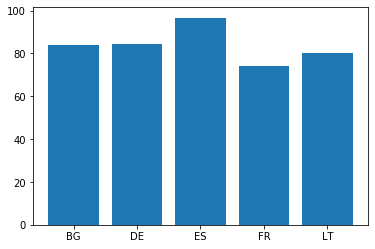

In [283]:
# Declarate satisfaction with lifestyle rates are quite different
swl = pd.DataFrame(df_temp.groupby(['Country'])['WSOovsat'].count() / df_temp.groupby(['Country'])['IndID'].count() * 100).reset_index()
plt.bar(x = swl['Country'], height = swl[0])

# Sources 

* microdata: <br/>
https://ec.europa.eu/eurostat/web/microdata/statistics-on-income-and-living-conditions  <br/>
<br/>
* qnr - documentation: 
    1. https://circabc.europa.eu/faces/jsp/extension/wai/navigation/container.jsp?FormPrincipal:_idcl=FormPrincipal:_id1&FormPrincipal_SUBMIT=1&id=c31bb5ae-2de6-49d3-bdcb-21992b3a2935&javax.faces.ViewState=SzJrqYa1KU%2FumdO8YesYp2FS2DYsJhsIX9J6aYFJPCdx9vGE1ax15Df%2Bt1bxLofMLe9qH71dMryDHA278PAof269QwtdgBBqEzZcHfmyFHoJ%2FMADu7GQWSDCxYzL4EBCMnQTIjtUHOOqnCI68odiBetzfM4%3D
    2. https://circabc.europa.eu/sd/a/d7e88330-3502-44fa-96ea-eab5579b4d1e/SILC065%20operation%202013%20VERSION%20MAY%202013.pdf